# Sample 15arc-sec GEBCO_2023.nc on OM4p25 grid

## Apply edits to the topography.

## Region 16: 0,30,10,60,

In [1]:
# Notebook editor: Brandon Reichl

# This notebook originated from Stephen Griffies, with many other contributors:
# Stephen.Griffies
# Alistair.Adcroft
# Robert.Hallberg
# Niki.Zadeh
# Raphael.Dussin

In [2]:
Region_Boundaries = [0,30,10,60]
Region_Name = '17: Northwest Indian Corner'

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import netCDF4
import xarray as xr
import cmocean
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import sys
sys.path.insert(1, './tools/')
from topo_tools import *

Resolution = 240 cells/degree
GEBCO loaded with (nj,ni) =  (43200, 86400)  min(lon) =  -300.0  max(lon) =  60.0


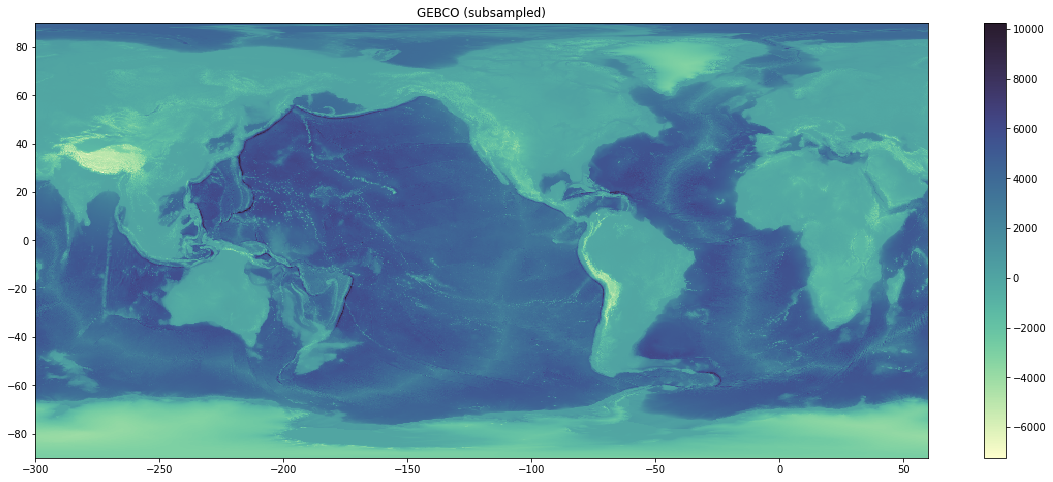

In [4]:
# GEBCO-2020 + Bedmachine combined topography 

fname_gebco  = "/archive/gold/datasets/topography/GEBCO_2023/GEBCO_2023.nc"

GEBCO = GEBCO_data(fname_gebco)

plt.figure(figsize=(20,8))
plt.pcolormesh(GEBCO.lonq[::100], GEBCO.latq[::100], GEBCO.depth[::100,::100], cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('GEBCO (subsampled)');

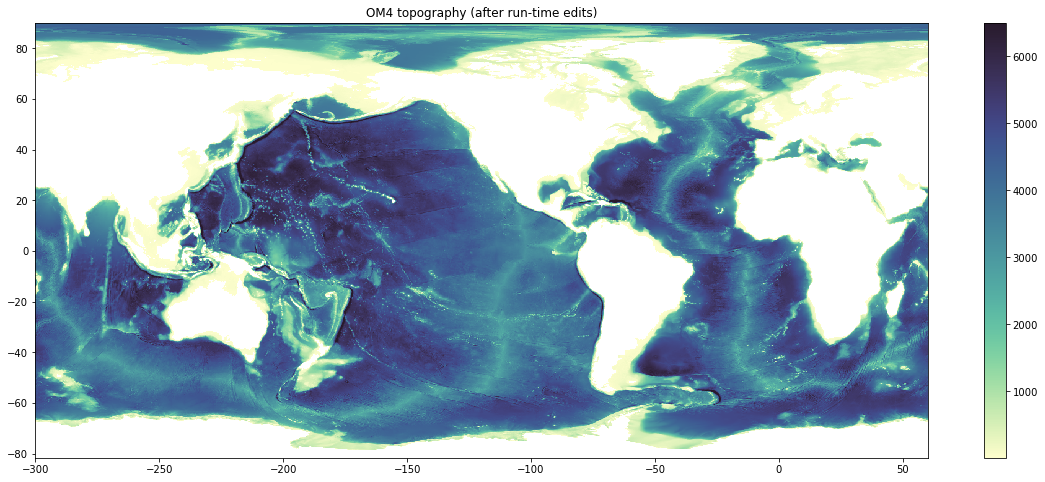

In [5]:
OM4 = OM4_data('/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_hgrid.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_static.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_mask.nc')
plt.figure(figsize=(20,8))
plt.pcolormesh(OM4.lonq, OM4.latq, OM4.depth, cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('OM4 topography (after run-time edits)');

OM5 longitudes are inconsistent!
OM5 latitudes are inconsistent!


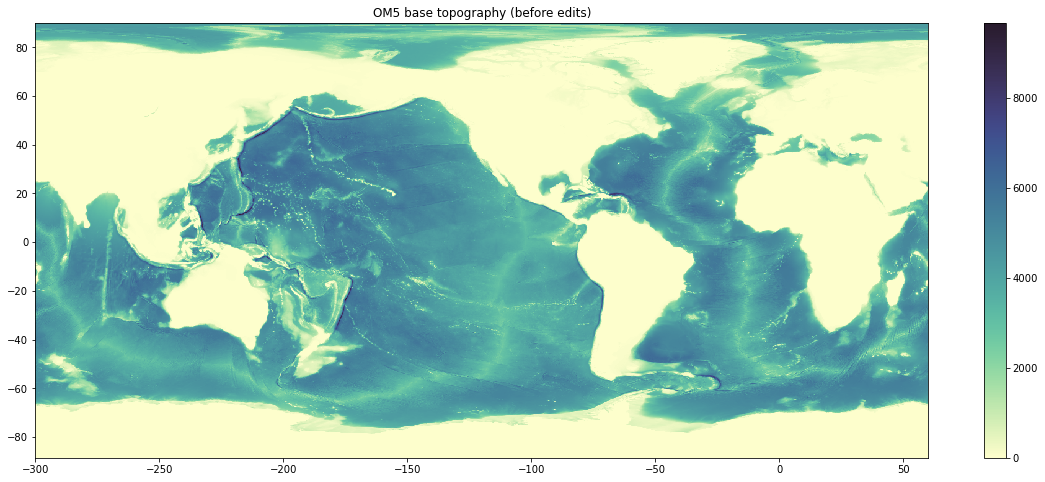

In [6]:
OM5 = OM5_data('ocean_hgrid.nc',
               'regridded_source_topog.nc')

plt.figure(figsize=(20,8))
plt.pcolormesh(OM5.lonq, OM5.latq, OM5.depth, cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('OM5 base topography (before edits)');

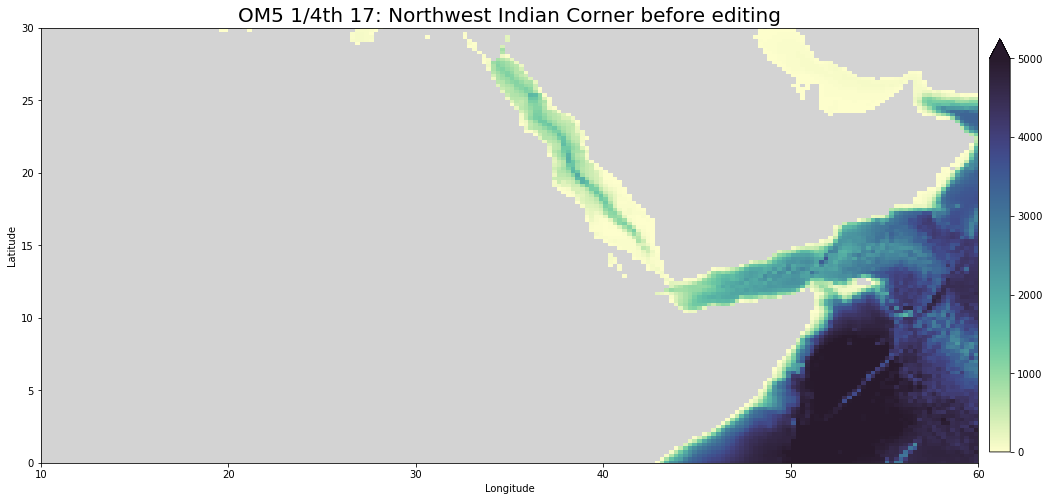

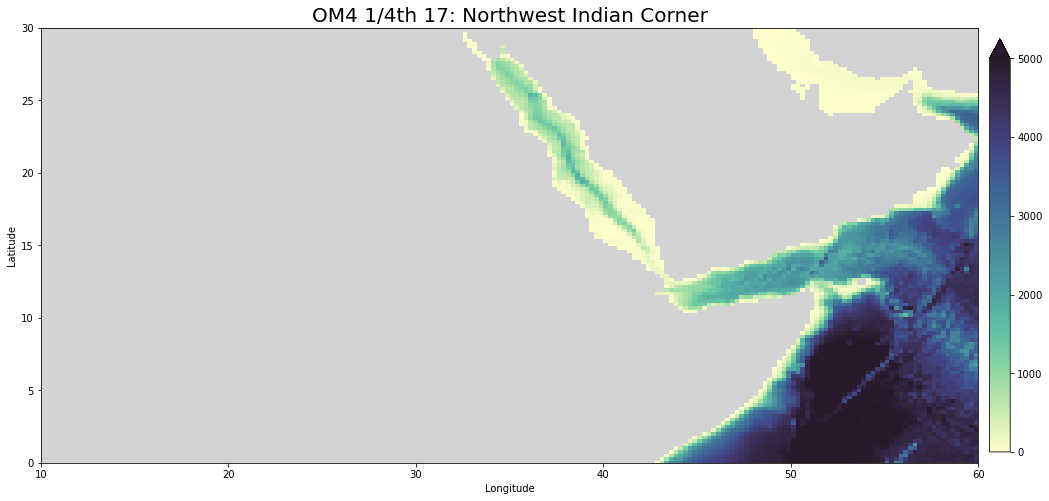

In [7]:
# Broad view of region before edits 

broadview(OM4,OM5,
          (Region_Boundaries[2],Region_Boundaries[3]),
          (Region_Boundaries[0],Region_Boundaries[1]),
          0, 5000, Region_Name, om4=True, new=False)

Gebco (js:je,is:ie) = 21599:23999,74399:76799
OM4 model (js:je,is:ie) = 502:544,1238:1280
OM5 model (js:je,is:ie) = 583:625,1238:1280
Using xlim = (10.0, 20.0) ylim = (0.0, 10.0)


./tools/topo_tools.py:202: UserWarning: No contour levels were found within the data range.
  thisax.contour(GEBCO.lonh[Gis:Gie], GEBCO.lath[Gjs:Gje], zmask( GEBCO.depth[Gjs:Gje,Gis:Gie] ),


Gebco (js:je,is:ie) = 23999:26399,74399:76799
OM4 model (js:je,is:ie) = 542:586,1238:1280
OM5 model (js:je,is:ie) = 623:667,1238:1280
Using xlim = (10.0, 20.0) ylim = (10.0, 20.0)


/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/matplotlib/contour.py:1486: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/matplotlib/contour.py:1487: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


Gebco (js:je,is:ie) = 26399:28799,74399:76799
OM4 model (js:je,is:ie) = 584:630,1238:1280
OM5 model (js:je,is:ie) = 665:711,1238:1280
Using xlim = (10.0, 20.0) ylim = (20.0, 30.0)


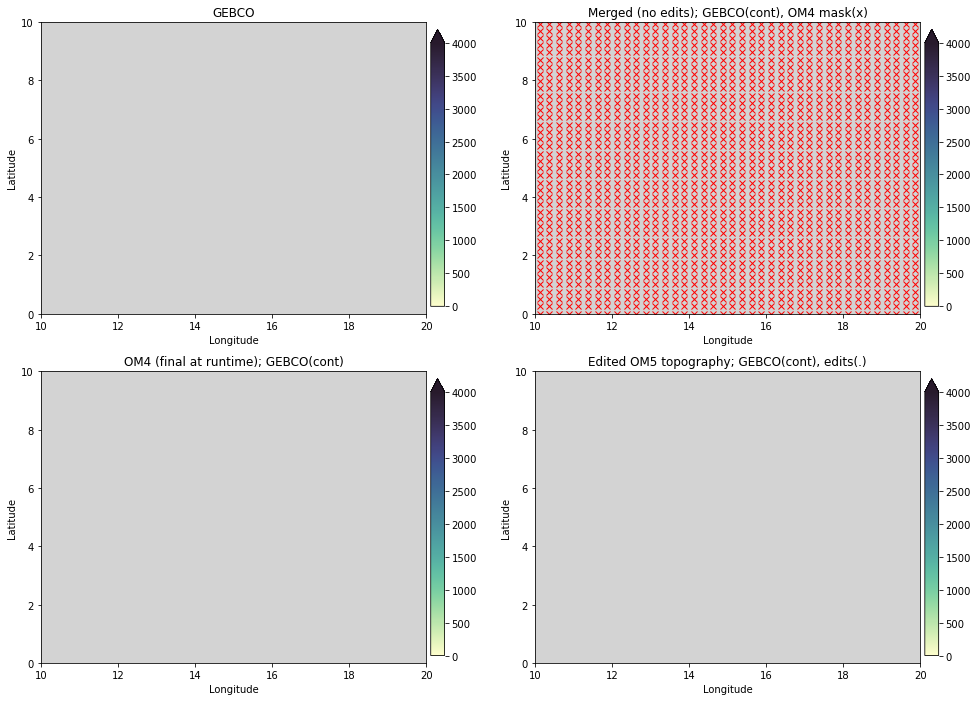

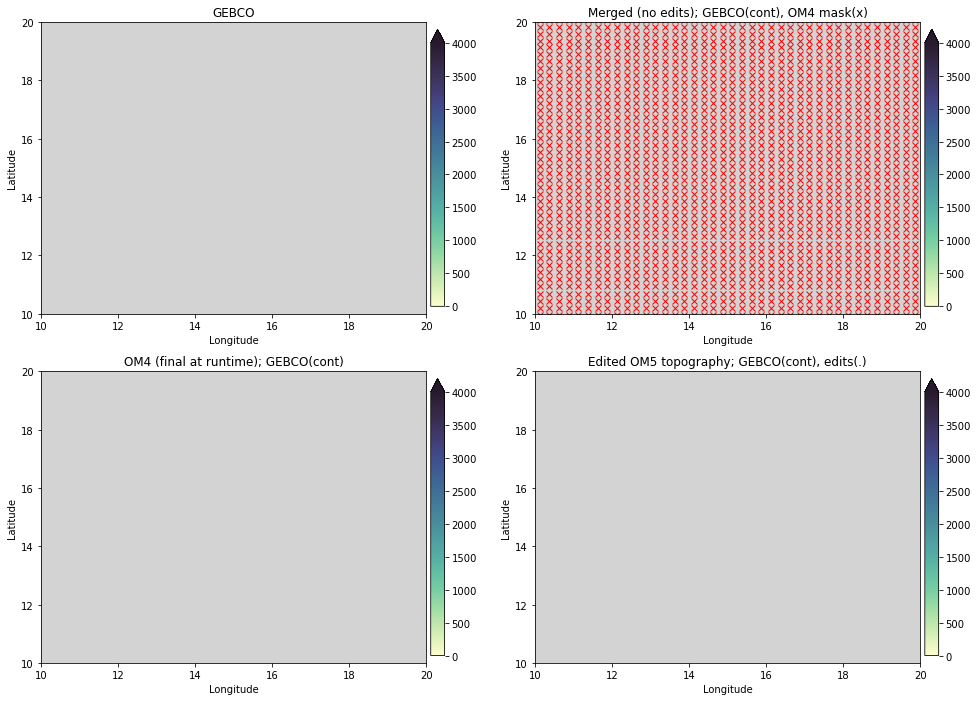

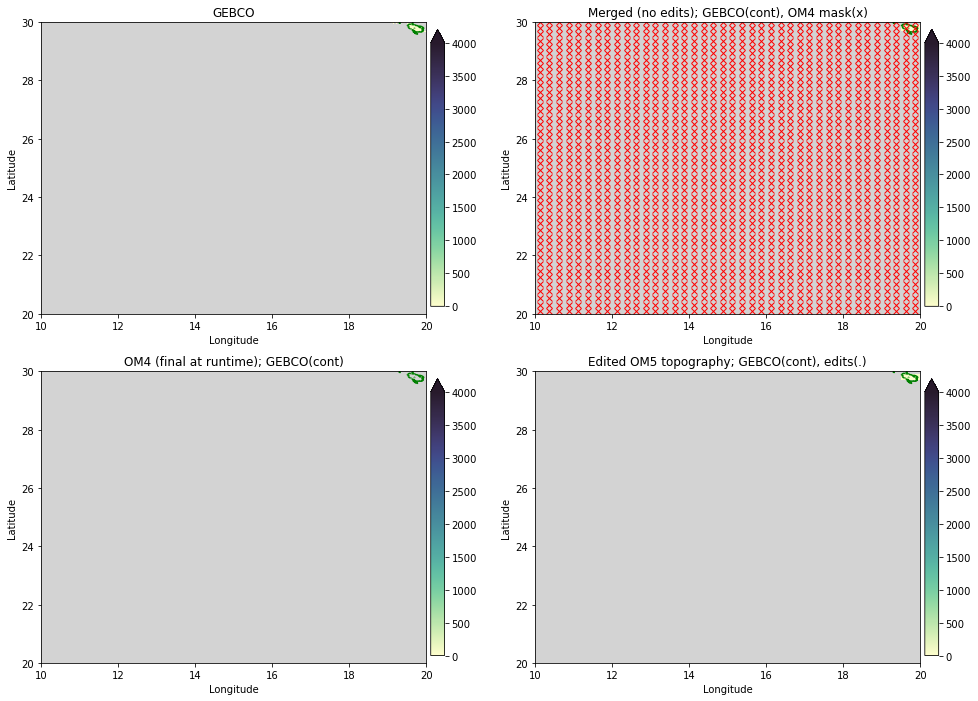

In [8]:
region = Region(15, 5, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(15, 15, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(15, 25, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);


Gebco (js:je,is:ie) = 21599:23999,76799:79199
OM4 model (js:je,is:ie) = 502:544,1278:1320
OM5 model (js:je,is:ie) = 583:625,1278:1320
Using xlim = (20.0, 30.0) ylim = (0.0, 10.0)
Gebco (js:je,is:ie) = 23999:26399,76799:79199
OM4 model (js:je,is:ie) = 542:586,1278:1320
OM5 model (js:je,is:ie) = 623:667,1278:1320
Using xlim = (20.0, 30.0) ylim = (10.0, 20.0)
Gebco (js:je,is:ie) = 26399:28799,76799:79199
OM4 model (js:je,is:ie) = 584:630,1278:1320
OM5 model (js:je,is:ie) = 665:711,1278:1320
Using xlim = (20.0, 30.0) ylim = (20.0, 30.0)


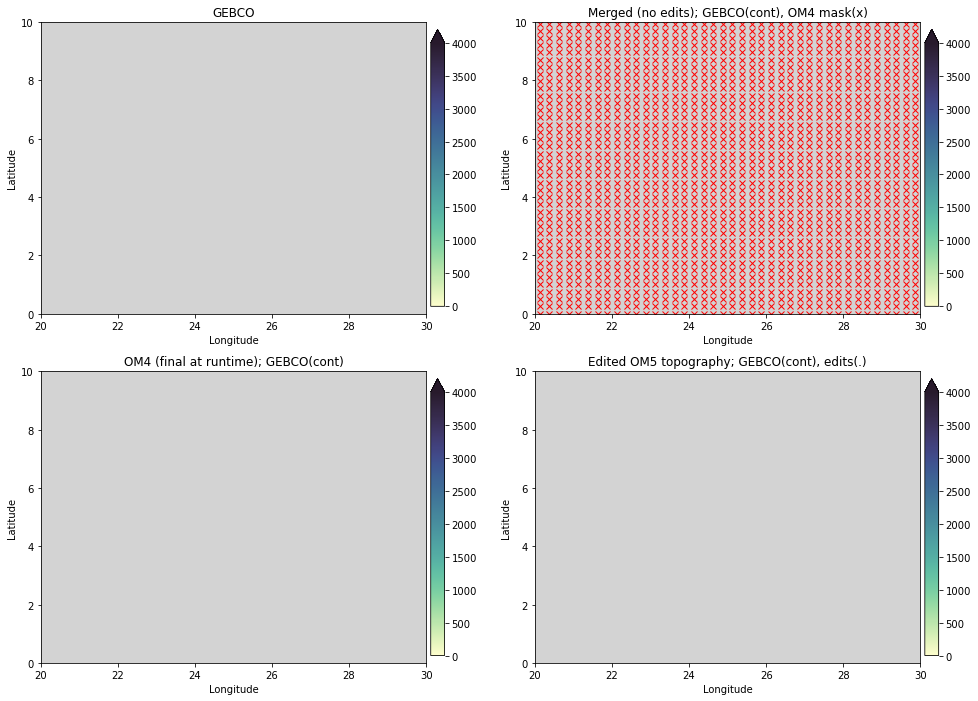

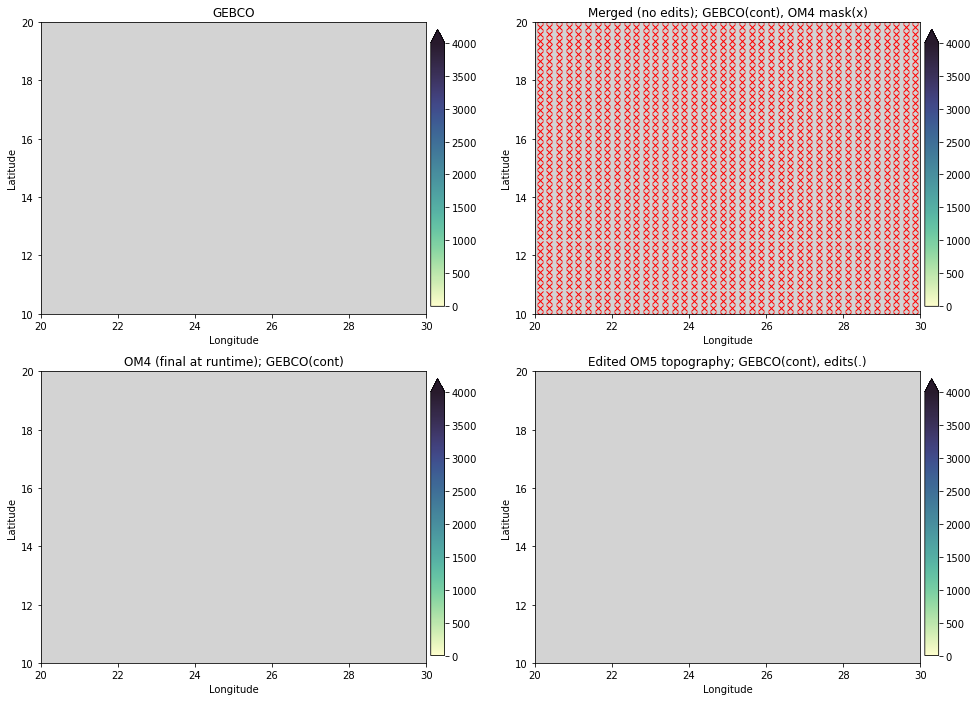

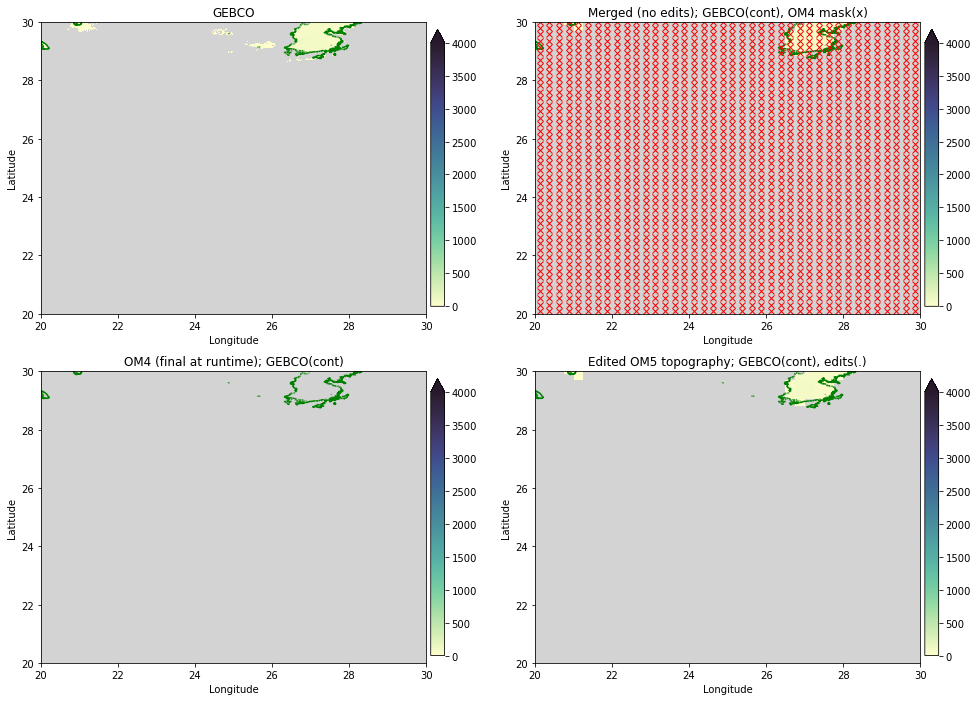

In [9]:
region = Region(25, 5, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(25, 15, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(25, 25, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);


Gebco (js:je,is:ie) = 21599:23999,79199:81599
OM4 model (js:je,is:ie) = 502:544,1318:1360
OM5 model (js:je,is:ie) = 583:625,1318:1360
Using xlim = (30.0, 40.0) ylim = (0.0, 10.0)
Gebco (js:je,is:ie) = 23999:26399,79199:81599
OM4 model (js:je,is:ie) = 542:586,1318:1360
OM5 model (js:je,is:ie) = 623:667,1318:1360
Using xlim = (30.0, 40.0) ylim = (10.0, 20.0)
Gebco (js:je,is:ie) = 26399:28799,79199:81599
OM4 model (js:je,is:ie) = 584:630,1318:1360
OM5 model (js:je,is:ie) = 665:711,1318:1360
Using xlim = (30.0, 40.0) ylim = (20.0, 30.0)


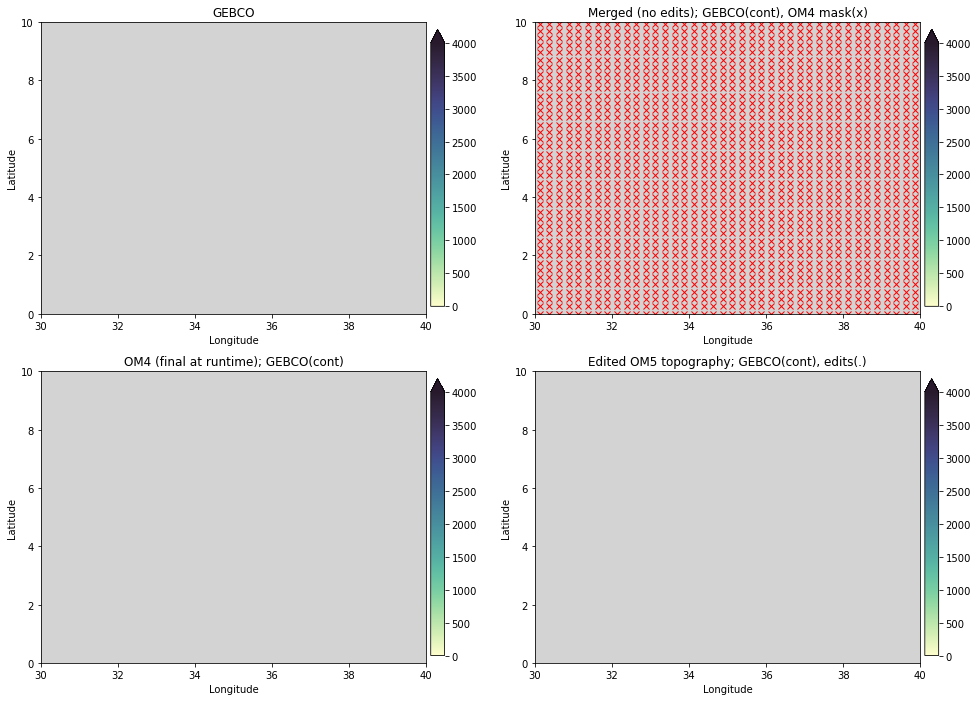

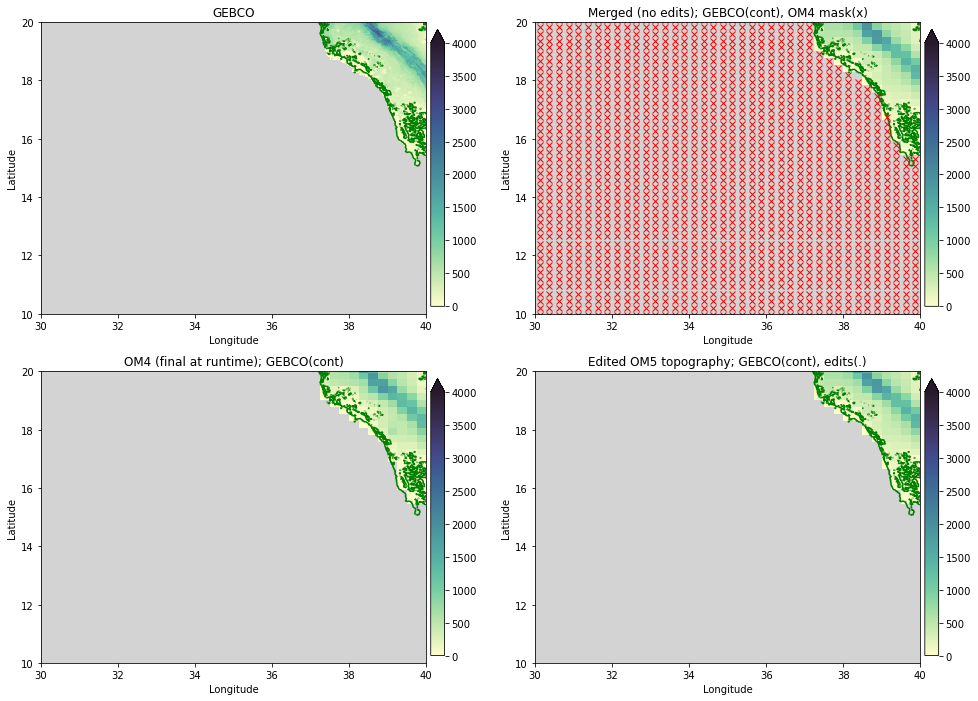

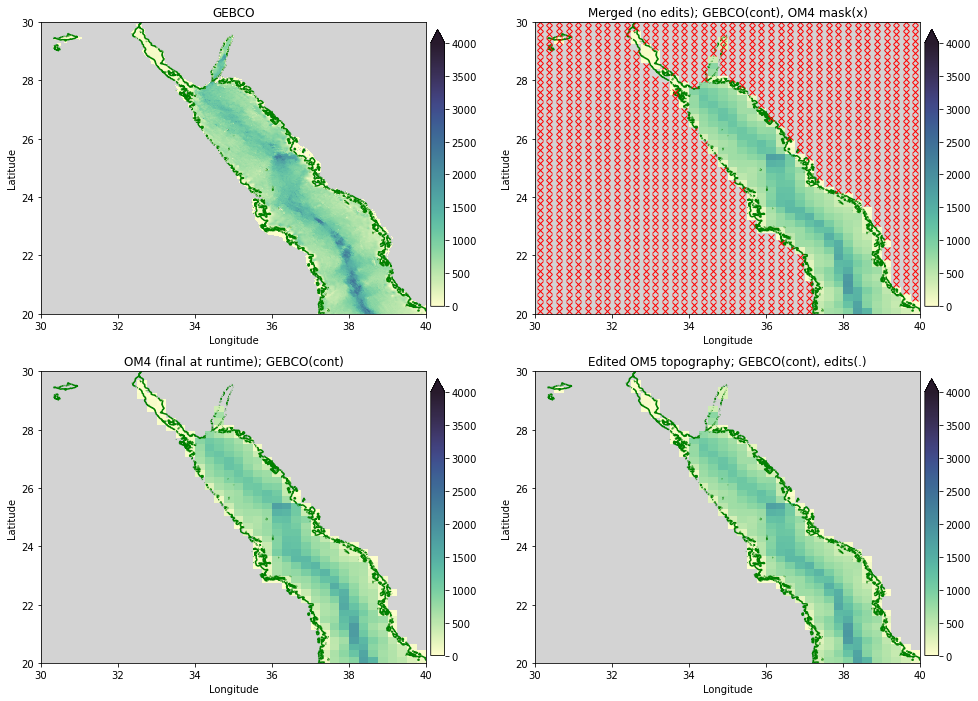

In [10]:
region = Region(35, 5, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(35, 15, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(35, 25, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);


Gebco (js:je,is:ie) = 28199:28919,80039:80759
OM4 model (js:je,is:ie) = 616:632,1332:1346
OM5 model (js:je,is:ie) = 697:713,1332:1346
Using xlim = (33.5, 36.5) ylim = (27.5, 30.5)
Gebco (js:je,is:ie) = 28079:28799,79608:80328
OM4 model (js:je,is:ie) = 614:630,1325:1339
OM5 model (js:je,is:ie) = 695:711,1325:1339
Using xlim = (31.700000000000003, 34.7) ylim = (27.0, 30.0)


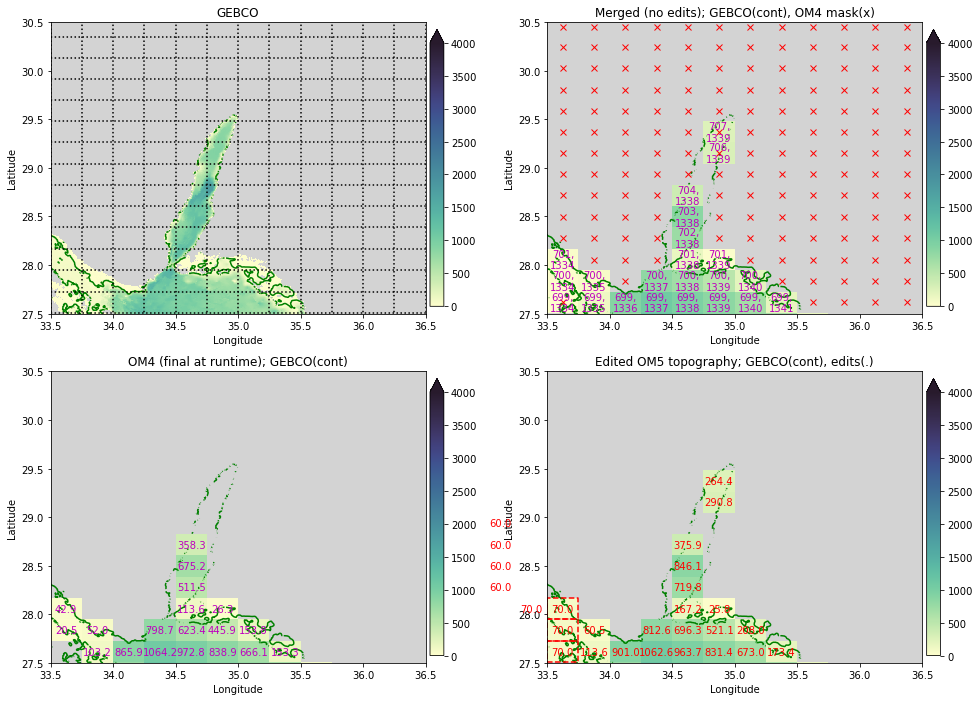

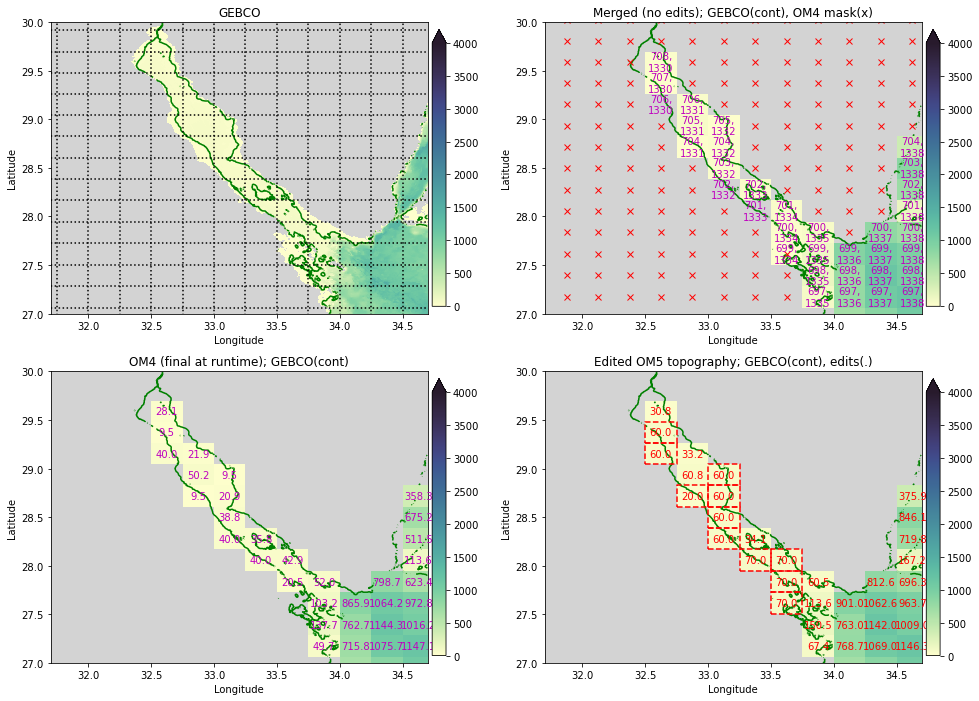

In [11]:
#from AJA
OM5.depth[707,1330] = 60.0
OM5.depth[706,1330] = 60.0
OM5.depth[704,1331] = 20.0
OM5.depth[702:706,1332] = 60.0
OM5.depth[701,1333] = 70.0
OM5.depth[699:702,1334] = 70.0

region = Region(35, 29, width_lon=3, width_lat=3)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=True);

region = Region(33.2, 28.5, width_lon=3, width_lat=3)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=True);


Gebco (js:je,is:ie) = 21599:23999,81599:83999
OM4 model (js:je,is:ie) = 502:544,1358:1400
OM5 model (js:je,is:ie) = 583:625,1358:1400
Using xlim = (40.0, 50.0) ylim = (0.0, 10.0)
Gebco (js:je,is:ie) = 23999:26399,81599:83999
OM4 model (js:je,is:ie) = 542:586,1358:1400
OM5 model (js:je,is:ie) = 623:667,1358:1400
Using xlim = (40.0, 50.0) ylim = (10.0, 20.0)
Gebco (js:je,is:ie) = 26399:28799,81599:83999
OM4 model (js:je,is:ie) = 584:630,1358:1400
OM5 model (js:je,is:ie) = 665:711,1358:1400
Using xlim = (40.0, 50.0) ylim = (20.0, 30.0)


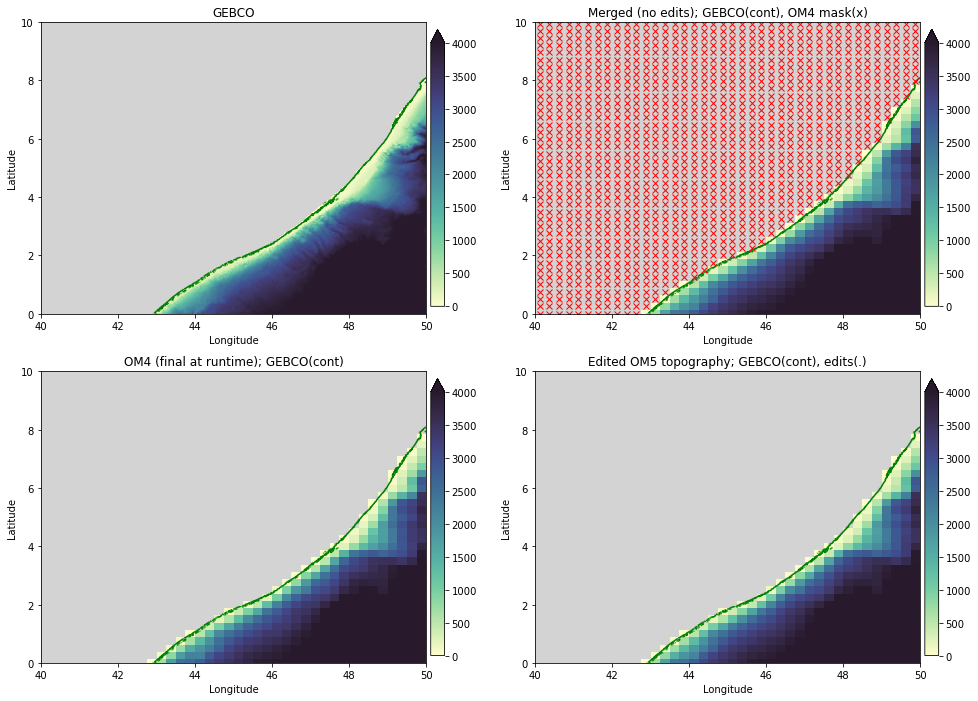

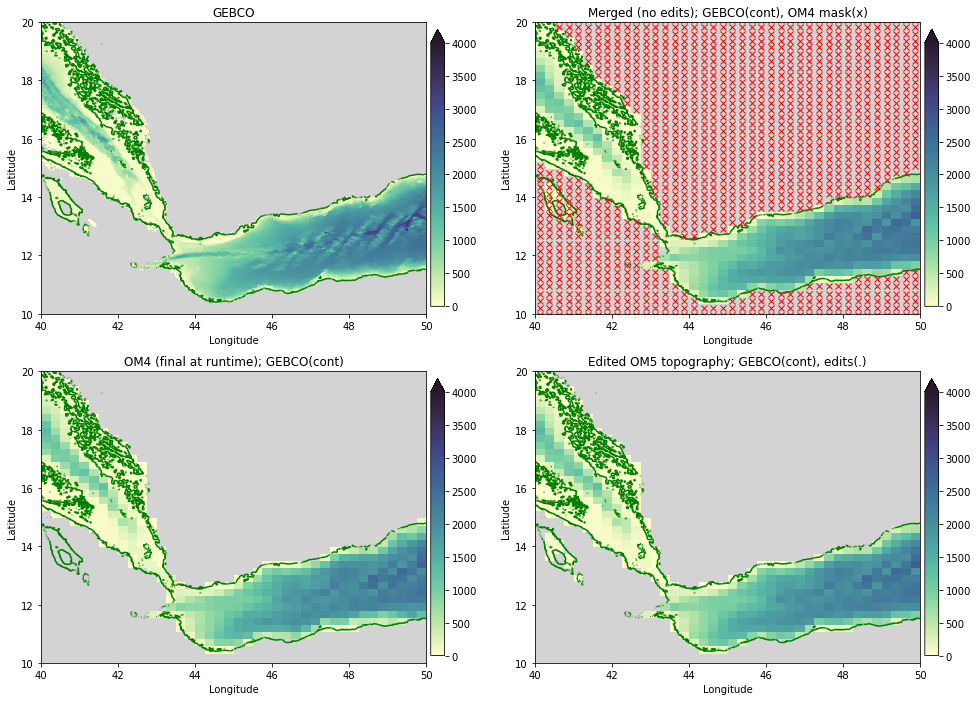

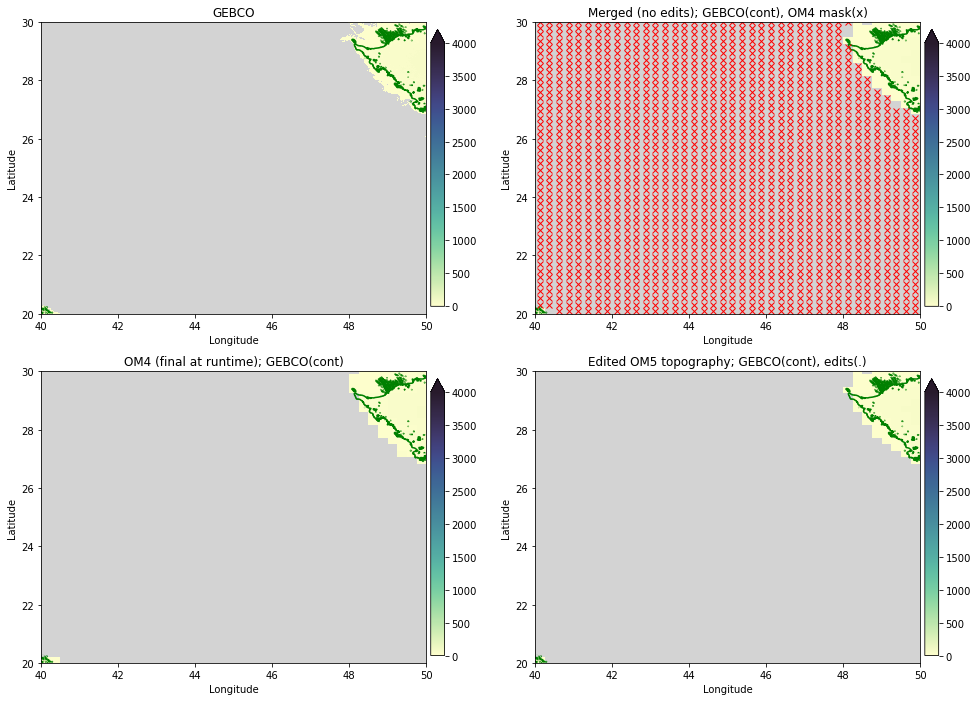

In [12]:
region = Region(45, 5, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(45, 15, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(45, 25, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);


Gebco (js:je,is:ie) = 24359:25079,82079:82559
OM4 model (js:je,is:ie) = 548:563,1366:1376
OM5 model (js:je,is:ie) = 629:644,1366:1376
Using xlim = (42.0, 44.0) ylim = (11.5, 14.5)


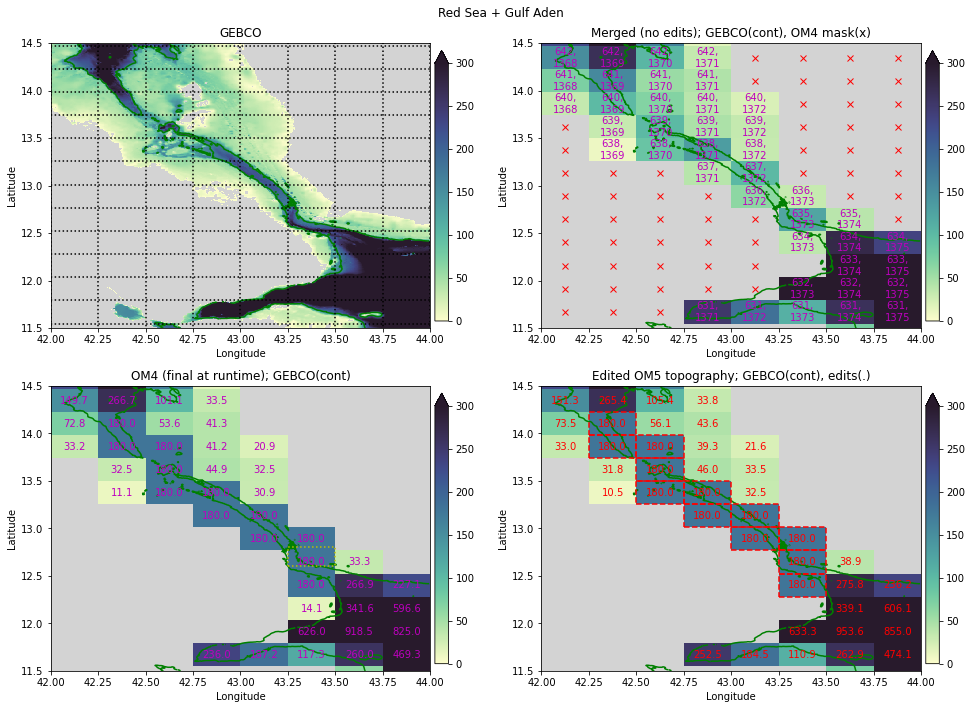

In [13]:
region = Region(43.0, 13., width_lon=2, width_lat=3)

#from AJA
OM5.depth[634:637,1373] = 180.0
OM5.depth[636:638,1372] = 180.0
OM5.depth[637:639,1371] = 180.0
OM5.depth[638:641,1370] = 180.0
OM5.depth[640:642,1369] = 180.0

map_region(region, 0, 300, GEBCO, OM4, OM5, 'Red Sea + Gulf Aden', gebco_contours=[170]);

Gebco (js:je,is:ie) = 21599:23999,83999:86399
OM4 model (js:je,is:ie) = 502:544,1398:1440
OM5 model (js:je,is:ie) = 583:625,1398:1440
Using xlim = (50.0, 60.0) ylim = (0.0, 10.0)
Gebco (js:je,is:ie) = 23999:26399,83999:86399
OM4 model (js:je,is:ie) = 542:586,1398:1440
OM5 model (js:je,is:ie) = 623:667,1398:1440
Using xlim = (50.0, 60.0) ylim = (10.0, 20.0)
Gebco (js:je,is:ie) = 26399:28799,83999:86399
OM4 model (js:je,is:ie) = 584:630,1398:1440
OM5 model (js:je,is:ie) = 665:711,1398:1440
Using xlim = (50.0, 60.0) ylim = (20.0, 30.0)


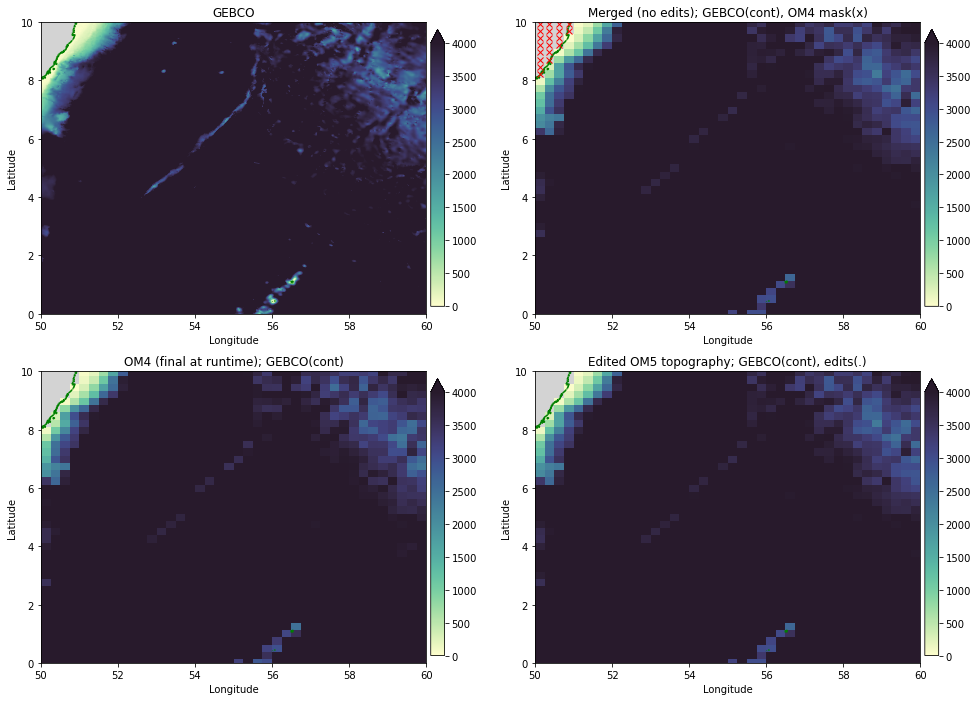

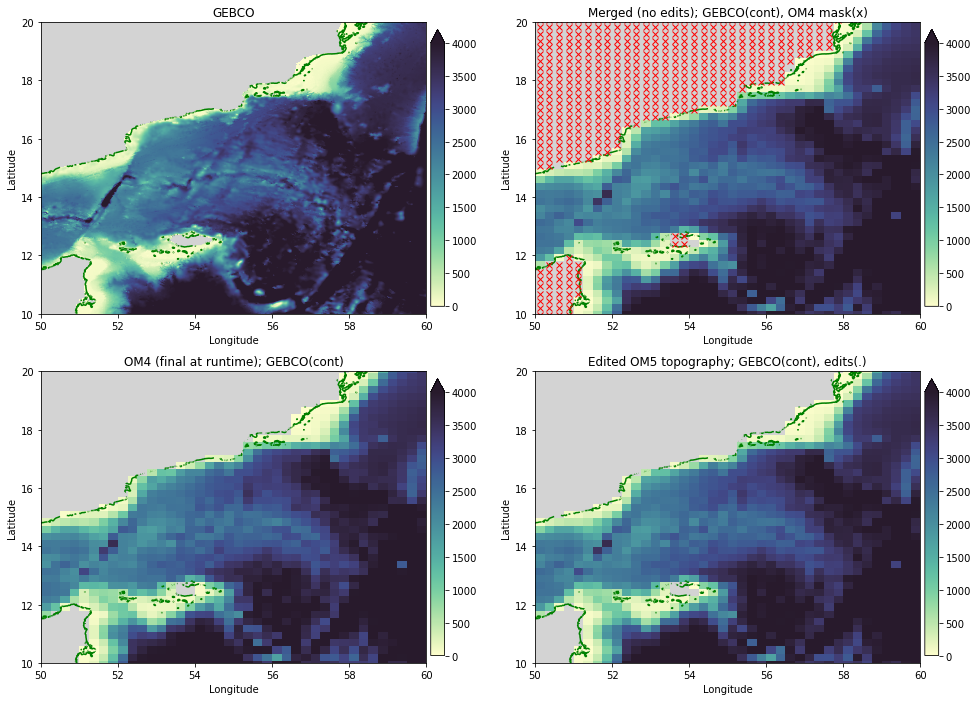

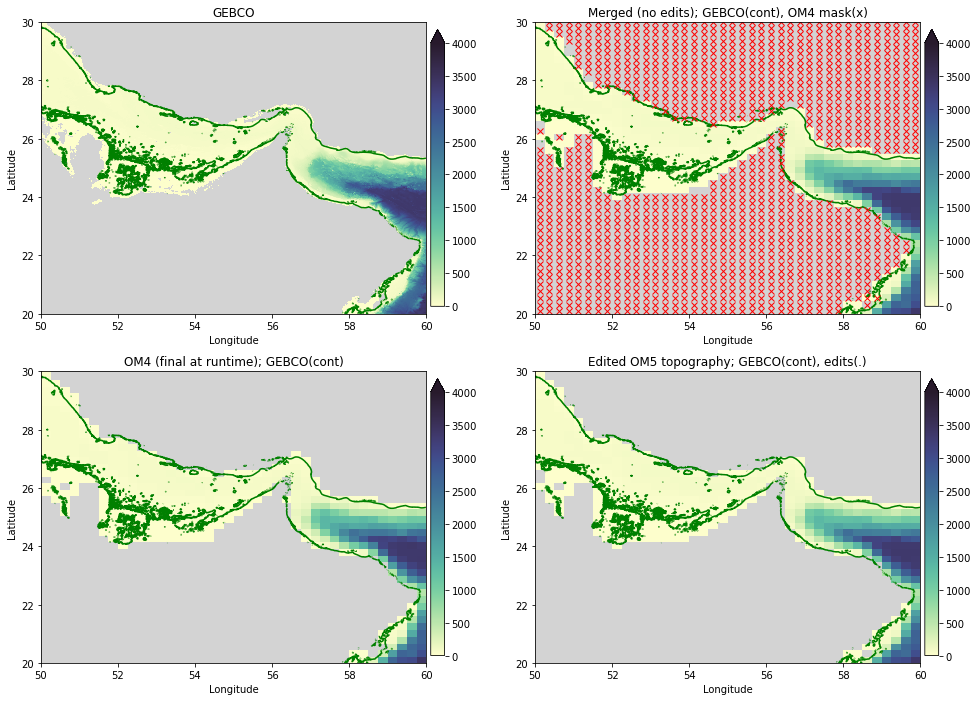

In [14]:
region = Region(55, 5, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(55, 15, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);

region = Region(55, 25, width_lon=10, width_lat=10)
map_region(region, 0, 4000, GEBCO, OM4, OM5, '', gebco_contours=[20],text_depths=False);


Gebco (js:je,is:ie) = 27359:28079,83879:84599
OM4 model (js:je,is:ie) = 601:616,1396:1410
OM5 model (js:je,is:ie) = 682:697,1396:1410
Using xlim = (49.5, 52.5) ylim = (24.0, 27.0)


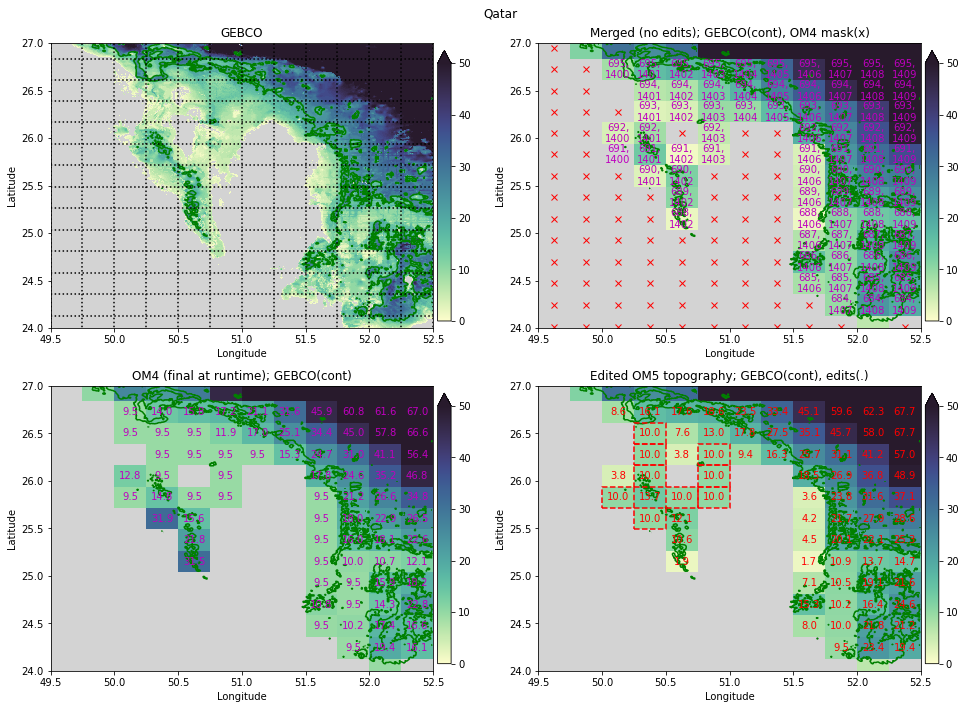

In [15]:
#AJA
# Edits to fill some spots around Qatar to avoid small embayments that can 
# have excessive evaporation and thus get huge (> 60ppt) salinity.  
# Do not worry about land-locked points that will later be taken care of by ICE9.

region = Region(51.0, 25.5, width_lon=3, width_lat=3)

#OM5.depth[613,1400] = 10  Need a j offset, 613 is wrong
#OM5.depth[610,1400] = 10  Need a j offset, 610 is wrong
OM5.depth[691,1400:1404] = np.maximum(OM5.depth[691,1400:1404], 10)
OM5.depth[690:695,1401] = np.maximum(OM5.depth[690:695,1401], 10)
OM5.depth[691:694,1403] = np.maximum(OM5.depth[691:694,1403], 10)

map_region(region, 0, 50, GEBCO, OM4, OM5, 'Qatar', gebco_contours=[20], text_depths=True);

In [16]:
OM5.write_nc("om5_topo_edits_region_17.nc")

New Depth at jEdit=634 iEdit=1373 set to 180.0
New Depth at jEdit=635 iEdit=1373 set to 180.0
New Depth at jEdit=636 iEdit=1372 set to 180.0
New Depth at jEdit=636 iEdit=1373 set to 180.0
New Depth at jEdit=637 iEdit=1371 set to 180.0
New Depth at jEdit=637 iEdit=1372 set to 180.0
New Depth at jEdit=638 iEdit=1370 set to 180.0
New Depth at jEdit=638 iEdit=1371 set to 180.0
New Depth at jEdit=639 iEdit=1370 set to 180.0
New Depth at jEdit=640 iEdit=1369 set to 180.0
New Depth at jEdit=640 iEdit=1370 set to 180.0
New Depth at jEdit=641 iEdit=1369 set to 180.0
New Depth at jEdit=690 iEdit=1401 set to 10.0
New Depth at jEdit=691 iEdit=1400 set to 10.0
New Depth at jEdit=691 iEdit=1402 set to 10.0
New Depth at jEdit=691 iEdit=1403 set to 10.0
New Depth at jEdit=692 iEdit=1401 set to 10.0
New Depth at jEdit=692 iEdit=1403 set to 10.0
New Depth at jEdit=693 iEdit=1401 set to 10.0
New Depth at jEdit=693 iEdit=1403 set to 10.0
New Depth at jEdit=694 iEdit=1401 set to 10.0
New Depth at jEdit=699